<a href="https://colab.research.google.com/github/dp4116/My-Project/blob/main/final_3rd_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependecies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart.csv', '.ipynb_checkpoints', 'sample_data']


Data Processing

In [ ]:
dataset = pd.read_csv('/content/heart.csv')

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
dataset.shape

(1025, 14)

In [ ]:
# getting some info about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#checking for missing values in data set
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#statistical measures about the data
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


Analysing Target feature

1    526
0    499
Name: target, dtype: int64


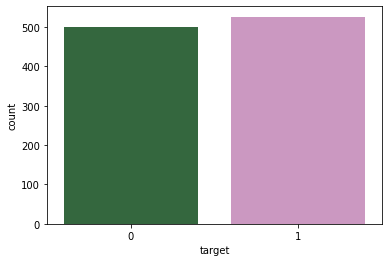

In [ ]:
ax = sns.countplot(dataset["target"],palette ="cubehelix" )
target_temp = dataset.target.value_counts()
print(target_temp)

In [ ]:
print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patients without heart problems: 164.69
Percentage of patients with heart problems: 173.6


Analysing Sex feature

In [ ]:
dataset["sex"].unique()

array([1, 0])

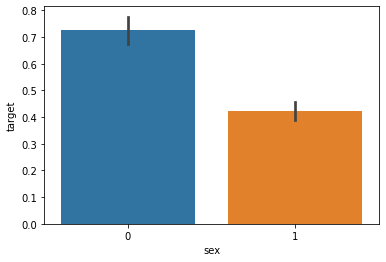

In [ ]:
sns.barplot(dataset["sex"],dataset["target"])

Analysing Chest Pain feature

In [ ]:
dataset["cp"].unique()

array([0, 1, 2, 3])

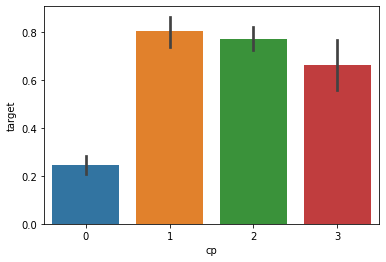

In [ ]:
sns.barplot(dataset["cp"],dataset["target"])

Analysing the FBS feature 

In [ ]:
dataset["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

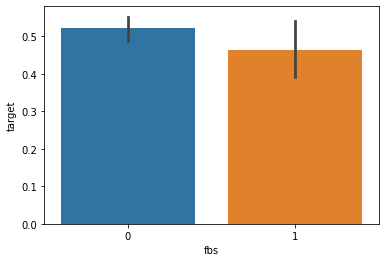

In [ ]:
sns.barplot(dataset["fbs"],dataset["target"])

Analysing the restecg feature

In [ ]:
dataset["restecg"].unique()

array([1, 0, 2])

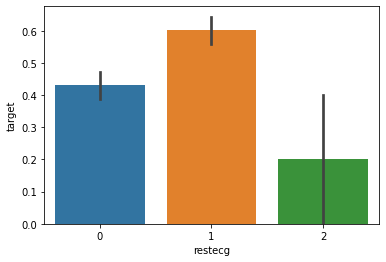

In [ ]:
sns.barplot(dataset["restecg"],dataset["target"])

Analysing the 'exang' feature

In [ ]:
dataset["exang"].unique()

array([0, 1])

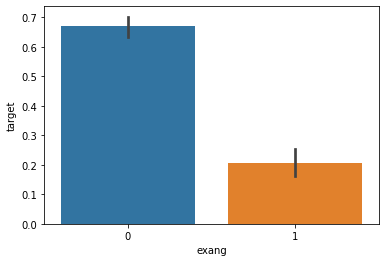

In [ ]:
sns.barplot(dataset["exang"],dataset["target"])

Analysing the Slope feature

In [ ]:
dataset["slope"].unique()

array([2, 0, 1])

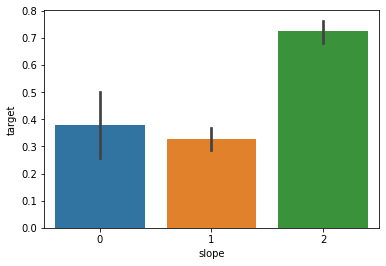

In [ ]:
sns.barplot(dataset["slope"],dataset["target"])

Analysing the 'ca' feature

In [ ]:
dataset["ca"].unique()

array([2, 0, 1, 3, 4])

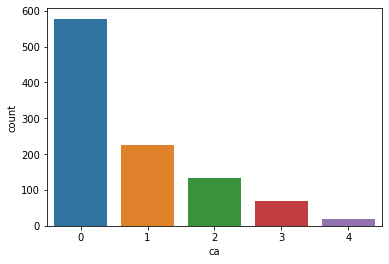

In [ ]:
sns.countplot(dataset["ca"])

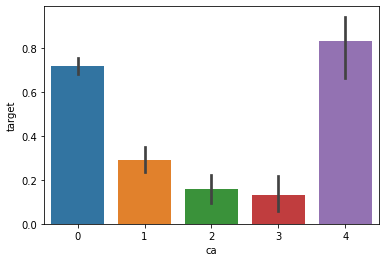

In [ ]:
sns.barplot(dataset["ca"],dataset["target"])

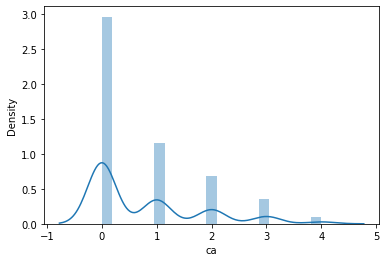

In [ ]:
sns.distplot(dataset["ca"])

Analysing thal feature

In [ ]:
dataset["thal"].unique()

array([3, 2, 1, 0])

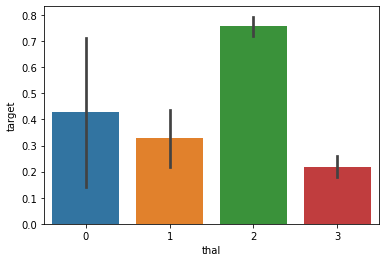

In [ ]:
sns.barplot(dataset["thal"],dataset["target"])

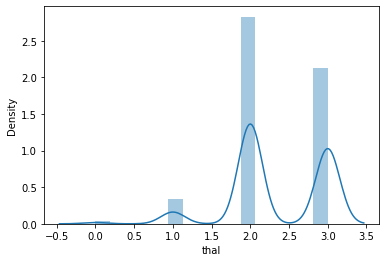

In [ ]:
sns.distplot(dataset["thal"])

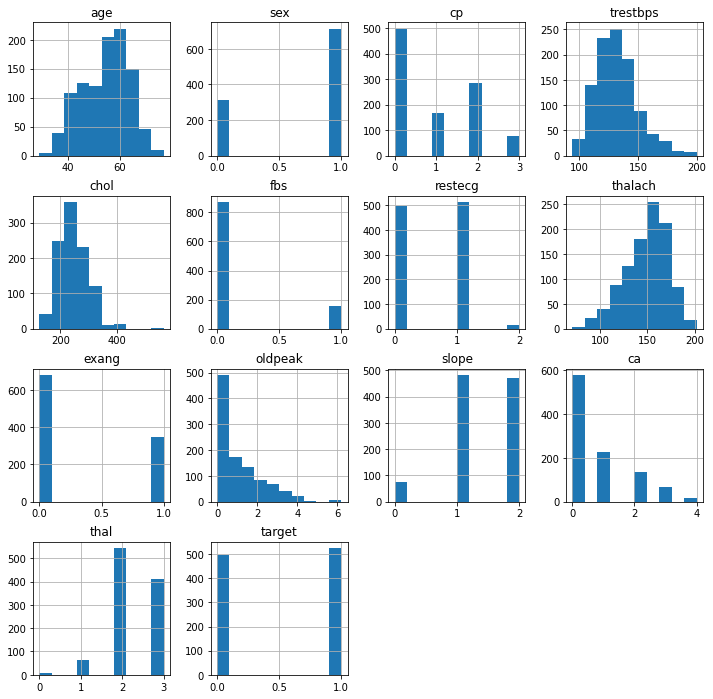

In [ ]:
dataset.hist(figsize = (12, 12))
plt.show()

#Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.30,random_state=0)

In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape);

(717, 13) (308, 13) (717,) (308,)


#Model Training

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(308,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 87.01 %


Confusion Matrix

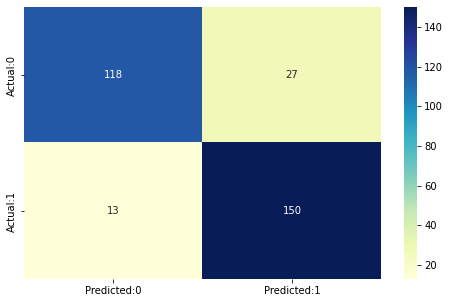

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred_lr)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [ ]:
#Model Evaluation Statics 
score_cm = ((TP+TN)/float(TP+TN+FP+FN))*100
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8701298701298701 
 The Missclassification = 1-Accuracy =  0.1298701298701299 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9202453987730062 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8137931034482758 
 Positive Predictive value = TP/(TP+FP) =  0.847457627118644 
 Negative predictive Value = TN/(TN+FN) =  0.9007633587786259 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  4.942058623040217 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.09800353540605176


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:
Y_pred_nb.shape

(308,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 84.42 %


The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8441558441558441 
 The Missclassification = 1-Accuracy =  0.1558441558441559 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8711656441717791 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8137931034482758 
 Positive Predictive value = TP/(TP+FP) =  0.8402366863905325 
 Negative predictive Value = TN/(TN+FN) =  0.8489208633093526 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  4.678482163144738 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.15831340334823754


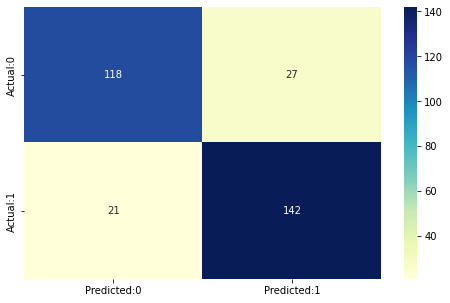

In [ ]:
# For Naive Bayes

cm_nb=confusion_matrix(Y_test,Y_pred_nb)
conf_matrix=pd.DataFrame(data=cm_nb,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
TN=cm_nb[0,0]
TP=cm_nb[1,1]
FN=cm_nb[1,0]
FP=cm_nb[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
score_cm_nb = ((TP+TN)/float(TP+TN+FP+FN))*100
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

SVM

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
Y_pred_svm.shape

(308,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 85.39 %


The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8538961038961039 
 The Missclassification = 1-Accuracy =  0.14610389610389607 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9263803680981595 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.7724137931034483 
 Positive Predictive value = TP/(TP+FP) =  0.8206521739130435 
 Negative predictive Value = TN/(TN+FN) =  0.9032258064516129 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  4.070459193158579 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.09531113058720424


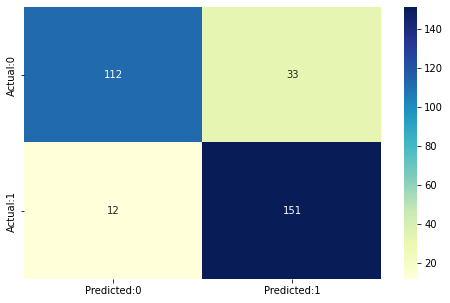

In [ ]:
# For SVM

cm_svm=confusion_matrix(Y_test,Y_pred_svm)
conf_matrix=pd.DataFrame(data=cm_svm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
TN=cm_svm[0,0]
TP=cm_svm[1,1]
FN=cm_svm[1,0]
FP=cm_svm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
score_cm_svm = ((TP+TN)/float(TP+TN+FP+FN))*100
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
Y_pred_knn.shape

(308,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 74.68 %


The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.7467532467532467 
 The Missclassification = 1-Accuracy =  0.2532467532467533 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.754601226993865 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.7379310344827587 
 Positive Predictive value = TP/(TP+FP) =  0.7639751552795031 
 Negative predictive Value = TN/(TN+FN) =  0.7278911564625851 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  2.87939941879238 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.3325497391204633


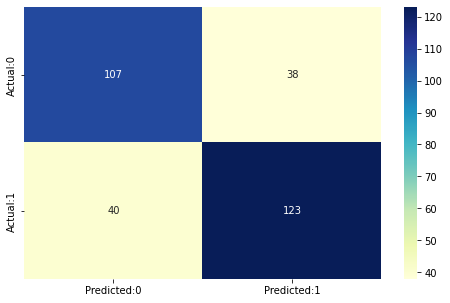

In [ ]:
# For KNN

cm_knn=confusion_matrix(Y_test,Y_pred_knn)
conf_matrix=pd.DataFrame(data=cm_knn,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
TN=cm_knn[0,0]
TP=cm_knn[1,1]
FN=cm_knn[1,0]
FP=cm_knn[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
score_cm_knn = ((TP+TN)/float(TP+TN+FP+FN))*100
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

(308,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 97.08 %


The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9707792207792207 
 The Missclassification = 1-Accuracy =  0.02922077922077926 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9877300613496932 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9517241379310345 
 Positive Predictive value = TP/(TP+FP) =  0.9583333333333334 
 Negative predictive Value = TN/(TN+FN) =  0.9857142857142858 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  20.46012269938651 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.012892326842713655


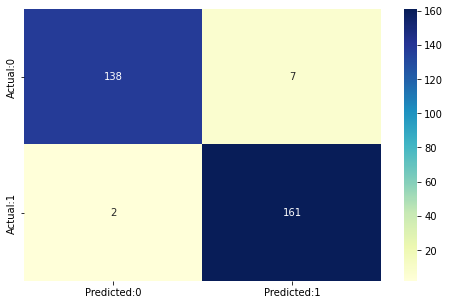

In [ ]:
# For XG Boost

cm_xg=confusion_matrix(Y_test,Y_pred_xgb)
conf_matrix=pd.DataFrame(data=cm_xg,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
TN=cm_xg[0,0]
TP=cm_xg[1,1]
FN=cm_xg[1,0]
FP=cm_xg[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
score_cm_xg = ((TP+TN)/float(TP+TN+FP+FN))*100
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Using TensorFlow backend.
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
23/23 [==============================] - 0s 2ms/step - loss: 15.4823 - accuracy: 0.5063
Epoch 2/300
23/23 [==============================] - 0s 2ms/step - loss: 3.0109 - accuracy: 0.5342
Epoch 3/300
23/23 [==============================] - 0s 2ms/step - loss: 1.7315 - accuracy: 0.5858
Epoch 4/300
23/23 [==============================] - 0s 2ms/step - loss: 1.4785 - accuracy: 0.6039
Epoch 5/300
23/23 [==============================] - 0s 2ms/step - loss: 1.3169 - accuracy: 0.5858
Epoch 6/300
23/23 [==============================] - 0s 2ms/step - loss: 1.1309 - accuracy: 0.5900
Epoch 7/300
23/23 [==============================] - 0s 2ms/step - loss: 0.9695 - accuracy: 0.5941
Epoch 8/300
23/23 [==============================] - 0s 2ms/step - loss: 0.8562 - accuracy: 0.5914
Epoch 9/300
23/23 [==============================] - 0s 2ms/step - loss: 0.7186 - accuracy: 0.6053
Epoch 10/300
23/23 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6374
Epoch 11

In [ ]:
score_nn = 85.08

##Accuracy Comperision

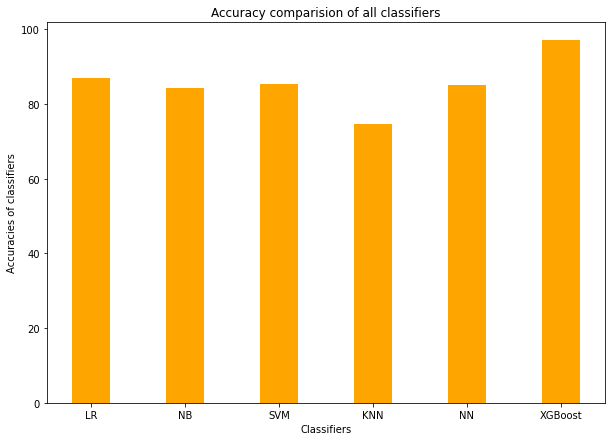

In [ ]:
accuracy_scores = {'LR':score_lr,'NB':score_nb,'SVM':score_svm,
                   'KNN':score_knn,'NN':score_nn,'XGBoost':score_xgb}
classifiers = list(accuracy_scores.keys())
Accuracy = list(accuracy_scores.values())

fig = plt.figure(figsize = (10,7))

plt.bar(classifiers,Accuracy,color = 'orange', width=0.4)

plt.xlabel("Classifiers")
plt.ylabel("Accuracies of classifiers")
plt.title("Accuracy comparision of all classifiers")
plt.show()



#Prediction Section

Building a Predictive System

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predictingg for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction_ans = model.predict(input_data_reshaped)
print(prediction_ans)

if(prediction_ans[0]==0):
  print('Tht Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')
    


[[0.08588204]]
The Person has Heart Disease
